


<h1 align=center> Weather Station Clustering using DBSCAN & scikit-learn </h1>
<hr>

DBSCAN is specially very good for tasks like class identification on a spatial context. The wonderful attribute of DBSCAN algorithm is that it can find out any arbitrary shape cluster without getting affected by noise. For example, this following example cluster the location of weather stations in Canada.

DBSCAN can be used here, for instance, to find the group of stations which show the same weather condition. As you can see, it not only finds different arbitrary shaped clusters, can find the denser part of data-centered samples by ignoring less-dense areas or noises.

let's start playing with the data. We will be working according to the following workflow: </font>
1. Loading data
- Overview data
- Data cleaning
- Data selection
- Clusteing

### About the dataset

		
<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>

 

##  Load the data

In [1]:
import pandas as pd
import numpy as np

pdf = pd.read_csv('weather-stations20140101-20141231.csv')
pdf.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [2]:
pdf.describe()

,Lat,Long,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,...,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD
count,1341.000000,1341.000000,1256.000000,1256.000000,357.000000,1260.000000,1260.000000,1260.000000,1260.000000,586.000000,...,1227.000000,1227.000000,209.000000,798.000000,1227.000000,0.0,0.0,0.0,1256.000000,1256.0
mean,51.185221,-96.670827,-12.062341,2.186306,-2.768908,2.612302,1.814286,-26.322381,1.816667,35.219966,...,50.402363,2.612062,118.368421,31.325815,7.480033,NaN,NaN,NaN,773.277150,0.0
std,6.216434,23.285512,10.416366,4.903077,4.840769,8.855823,4.249613,12.573066,4.438321,39.575586,...,62.312551,4.889425,64.527522,33.799751,4.740601,NaN,NaN,NaN,311.119277,0.0
min,41.949000,-140.868000,-38.200000,0.000000,-12.000000,-29.800000,0.000000,-49.700000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,26.000000,0.0
25%,46.983000,-116.501000,-18.500000,0.000000,-7.100000,-3.500000,0.000000,-35.425000,0.000000,9.000000,...,13.200000,0.000000,75.000000,2.000000,4.000000,NaN,NaN,NaN,560.100000,0.0
50%,49.850000,-101.400000,-13.800000,0.000000,-4.600000,2.500000,0.000000,-29.100000,0.000000,25.000000,...,27.100000,0.000000,104.000000,26.000000,7.000000,NaN,NaN,NaN,813.500000,0.0
75%,53.283000,-73.750000,-5.600000,2.000000,2.700000,10.000000,1.000000,-21.700000,1.000000,49.875000,...,60.500000,3.000000,147.000000,45.000000,11.000000,NaN,NaN,NaN,988.000000,0.0
max,82.500000,-52.753000,9.600000,27.000000,7.800000,22.000000,27.000000,5.300000,27.000000,245.000000,...,516.800000,27.000000,400.000000,253.000000,28.000000,NaN,NaN,NaN,1523.400000,0.0


In [3]:
# remove the rows with no TM values i.e no mean temperature values
pdf = pdf[pd.notnull(pdf['Tm'])]
pdf = pdf.reset_index(drop=True)
pdf.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


### 4-Visualization
Visualization of stations on map using basemap package. The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to a map projections. 

Please notice that the size of each data points represents the average of maximum temperature for each station in a year. 

In [4]:
from mpl_toolkits import basemap
import matplotlib as plt

%matplotlib inline

llon = -140
ulon = -50
llat = 40
ulat = 82

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) & (pdf['Lat'] < ulat)]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


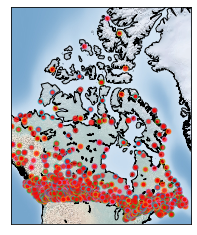

In [6]:
myMap = basemap.Basemap(projection='merc',
                       resolution='l',
                       area_thresh=1000.0,
                       llcrnrlon=llon, llcrnrlat=llat,
                       urcrnrlon=ulon, urcrnrlat=ulat)

myMap.drawcoastlines()
myMap.drawcountries()
myMap.fillcontinents(color='white', alpha=0.3)
myMap.shadedrelief()

# collect data based on stations
xs, ys = myMap(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm'] = xs.tolist()
pdf['ym'] = ys.tolist()

# visualisation
for index, row in pdf.iterrows():
    myMap.plot(row.xm, row.ym,
              markerfacecolor=([1, 0, 0]),
              marker='o',
              markersize=5,
              alpha=0.75)
    
plt.pyplot.show()

### 5- Clustering of stations based on their location i.e. Lat & Lon

__DBSCAN__ form sklearn library can runs DBSCAN clustering from vector array or distance matrix. In our case, we pass it the Numpy array Clus_dataSet to find core samples of high density and expands clusters from them. 

In [8]:
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import sklearn
sklearn.utils.check_random_state(1000)

clusDataset = pdf[['xm','ym']]
clusDataset = np.nan_to_num(clusDataset)
clusDataset = StandardScaler().fit_transform(clusDataset)

# compute DBSCAN
db = DBSCAN(eps=0.15,
           min_samples=10).fit(clusDataset)
coreSamplesMask = np.zeros_like(db.labels_, dtype=bool)
coreSamplesMask[db.core_sample_indices_] = True

labels = db.labels_
pdf['ClusterLabels'] = labels
realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

pdf[['Stn_Name', 'Tx', 'Tm', 'ClusterLabels']].head()

,Stn_Name,Tx,Tm,ClusterLabels
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


In [9]:
set(labels)

{-1, 0, 1}

## Visualization of clusters based on location


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


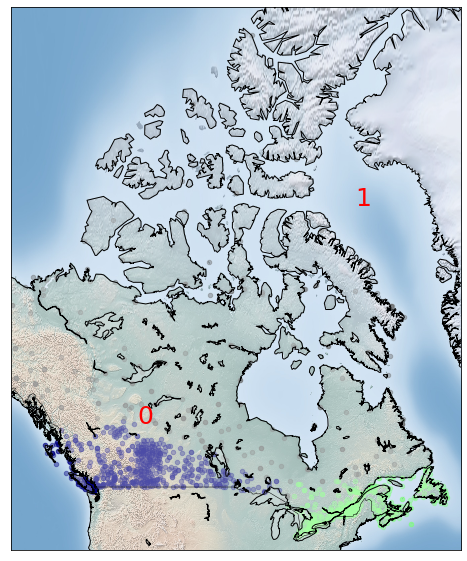

In [11]:
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(14, 10))

myMap = Basemap(projection='merc',
               resolution='l',
               area_thresh=1000.0,
               llcrnrlon=llon, llcrnrlat=llat,
               urcrnrlon=ulon, urcrnrlat=ulat)

myMap.drawcoastlines()
myMap.drawcountries()
myMap.fillcontinents(color='white', alpha=0.3)
myMap.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

# visualisation plot
for clusN in set(labels):
    c = (([0.4, 0.4, 0.4]) if clusN == -1 else colors[np.int(clusN)])
    clust_set = pdf[pdf.ClusterLabels == clusN]
    myMap.scatter(clust_set.xm, clust_set.ym,
                 color=c,
                 marker='o',
                 s=20,
                 alpha=0.4)
    if clusN != -1:
        cenx=np.mean(clust_set.xm)
        ceny = np.mean(clust_set.ym)
        plt.text(cenx, cenx,
                str(clusN),
                   fontsize=25,
                   color='red',)
        

## Clustering based on their location, mean, max, min temperature

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import sklearn

sklearn.utils.check_random_state(1000)

ClusteringDatasetLT = pdf[['xm', 'ym', 'Tm', 'Tx', 'Tn']]
ClusteringDatasetLT = np.nan_to_num(ClusteringDatasetLT)
ClusteringDatasetLT = StandardScaler().fit_transform(ClusteringDatasetLT)

# computer dbscan
db = DBSCAN(eps=0.3, min_samples=10).fit(ClusteringDatasetLT)
coreSamplesMask = np.zeros_like(db.labels_, dtype=bool)
coreSamplesMask[db.core_sample_indices_] = True
labels = db.labels_
pdf['ClusteringLabels'] = labels

realCLusNUm = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

pdf[['Stn_Name', 'Tx', 'Tm', 'ClusteringLabels']].head()

,Stn_Name,Tx,Tm,ClusteringLabels
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


In [13]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6}

## Visualisation of clusters based on location and temperature

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


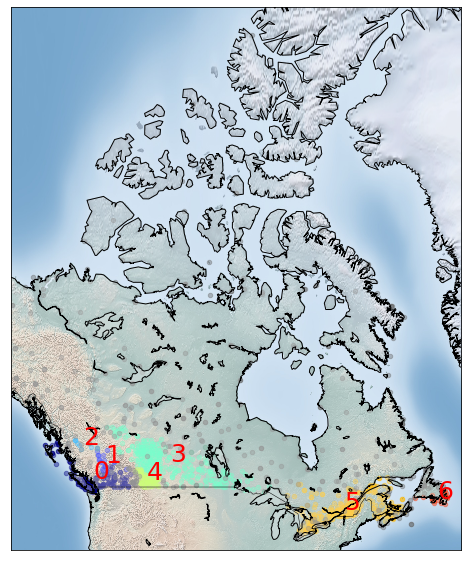

In [15]:
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt

%matplotlib inline 
plt.figure(figsize=(15, 10))

myMap = Basemap(projection='merc',
               resolution='l',
               area_thresh=1000.0,
               llcrnrlon=llon, llcrnrlat=llat,
               urcrnrlon=ulon, urcrnrlat=ulat)
myMap.drawcoastlines()
myMap.drawcountries()
myMap.fillcontinents(color='white', alpha=0.3)
myMap.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for cn in set(labels):
    c = (([0.4, 0.4, 0.4]) if cn == -1 else colors[np.int(cn)])
    cs = pdf[pdf.ClusteringLabels == cn]
    myMap.scatter(cs.xm, cs.ym,
                 color=c, 
                 marker='o',
                 s=20,
                 alpha=0.4)
    if cn != -1:
        cenx = np.mean(cs.xm)
        ceny = np.mean(cs.ym)
        plt.text(cenx, ceny, str(cn), fontsize=25, color='red')